# Exercises

In [6]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt


import prepare as p

The end result of this exercise should be a Jupyter notebook named `model`.

Using [saas.csv](https://ds.codeup.com/saas.csv) or log data from API usage or store_item_sales

**1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum.**

In [99]:
df = pd.read_csv('saas.csv')

In [100]:
df.head(40)

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0
5,2014-01-31,1000005,5000005,2.0,10.0
6,2014-01-31,1000006,5000006,0.0,0.0
7,2014-01-31,1000007,5000007,0.0,0.0
8,2014-01-31,1000008,5000008,0.0,0.0
9,2014-01-31,1000009,5000009,0.0,0.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month_Invoiced     790458 non-null  object 
 1   Customer_Id        790458 non-null  int64  
 2   Invoice_Id         790458 non-null  int64  
 3   Subscription_Type  790458 non-null  float64
 4   Amount             790458 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [102]:
df.isnull().sum()

Month_Invoiced       0
Customer_Id          0
Invoice_Id           0
Subscription_Type    0
Amount               0
dtype: int64

In [103]:
#set date to index
df = p.date_to_index(df, 'Month_Invoiced')

In [104]:
df.head()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0


In [105]:
df.tail()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2017-12-31,1029395,5790453,0.0,0.0
2017-12-31,1029396,5790454,0.0,0.0
2017-12-31,1029397,5790455,3.0,15.0
2017-12-31,1029398,5790456,0.0,0.0
2017-12-31,1029399,5790457,0.0,0.0


In [106]:
df.describe()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
count,7.904580e+05,7.904580e+05,790458.000000,790458.000000
mean,1.012913e+06,5.395228e+06,0.599235,2.996174
std,7.591992e+03,2.281857e+05,0.950380,4.751901
min,1.000000e+06,5.000000e+06,0.000000,0.000000
25%,1.006405e+06,5.197614e+06,0.000000,0.000000
50%,1.012797e+06,5.395228e+06,0.000000,0.000000
75%,1.019154e+06,5.592843e+06,1.000000,5.000000
max,1.029399e+06,5.790457e+06,4.000000,20.000000


In [107]:
df.nunique()

Customer_Id           29400
Invoice_Id           790458
Subscription_Type         5
Amount                    5
dtype: int64

In [108]:
# resample by any period, except daily, and aggregate using the sum.
df_resample =df.resample('W')[['Amount']].sum()

In [109]:
df_resample.head()

,Amount
Month_Invoiced,
2014-02-02,35850.0
2014-02-09,0.0
2014-02-16,0.0
2014-02-23,0.0
2014-03-02,37190.0


In [111]:
df_resample['n_sells'] =df.resample('W')[['Invoice_Id']].count()

In [112]:
df_resample

,Amount,n_sells
Month_Invoiced,,
2014-02-02,35850.0,20000
2014-02-09,0.0,0
2014-02-16,0.0,0
2014-02-23,0.0,0
2014-03-02,37190.0,19800
...,...,...
2017-12-03,53860.0,13985
2017-12-10,0.0,0
2017-12-17,0.0,0


## split Data

In [113]:
df_resample.head(1)

,Amount,n_sells
Month_Invoiced,,
2014-02-02,35850.0,20000


In [114]:
df_resample.tail(1)

,Amount,n_sells
Month_Invoiced,,
2017-12-31,53805.0,13914


In [115]:
train = df_resample[:'2015']
validate = df_resample['2016']
test = df_resample['2017']

print(train.shape)
print(validate.shape)
print(test.shape)



(100, 2)
(52, 2)
(53, 2)


In [116]:
train.head()

,Amount,n_sells
Month_Invoiced,,
2014-02-02,35850.0,20000
2014-02-09,0.0,0
2014-02-16,0.0,0
2014-02-23,0.0,0
2014-03-02,37190.0,19800


In [117]:
train.tail()

,Amount,n_sells
Month_Invoiced,,
2015-11-29,0.0,0
2015-12-06,51260.0,16387
2015-12-13,0.0,0
2015-12-20,0.0,0
2015-12-27,0.0,0


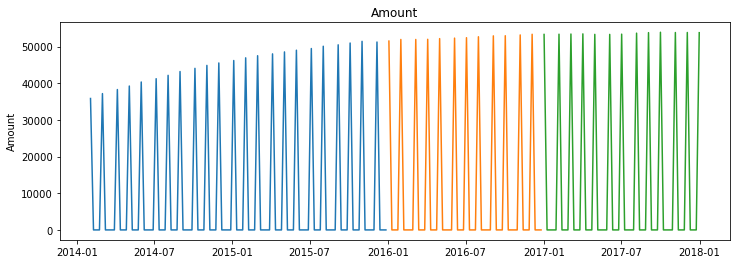

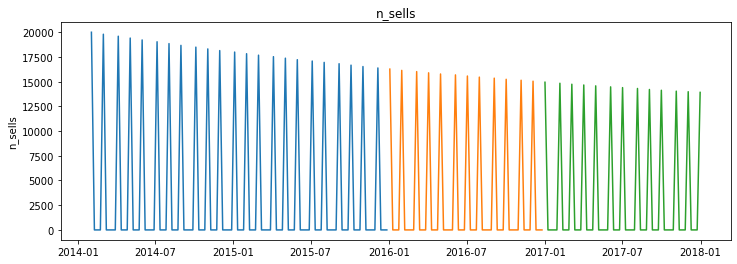

In [118]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])       
    plt.ylabel(col)
    plt.title(col)
    plt.show()

**2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:**

    - Simple Average
    - Moving Average
    - Holt's Linear Trend Model
    - Based on previous year/month/etc., this is up to you.

**- Simple average**

In [119]:
# compute simple average
amnt = round(train['Amount'].mean(),2)
amnt

10421.4

In [120]:
# compute simple average
sells = round(train['n_sells'].mean(),2)
sells

4156.26

In [121]:
def make_predictions():
    yhat_df = pd.DataFrame({'Amount':[amnt],
                           'n_sells': [sells]},
                          index=validate.index)
    return yhat_df

In [122]:
yhat_df = make_predictions()

In [123]:
yhat_df.head()

,Amount,n_sells
Month_Invoiced,,
2016-01-03,10421.4,4156.26
2016-01-10,10421.4,4156.26
2016-01-17,10421.4,4156.26
2016-01-24,10421.4,4156.26
2016-01-31,10421.4,4156.26


In [124]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [125]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

Amount -- RMSE: 22169


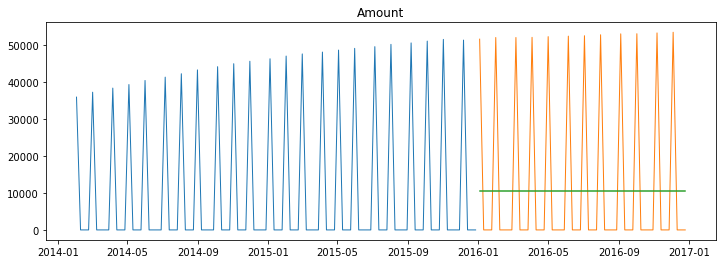

n_sells -- RMSE: 6612


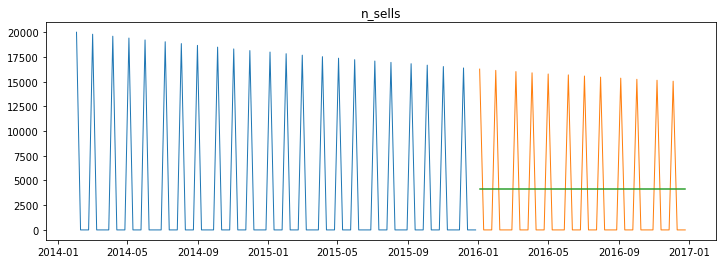

In [126]:
for col in train.columns:
    plot_and_eval(col)

In [127]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [129]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [130]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

,model_type,target_var,rmse
0,simple_average,Amount,22169.0
1,simple_average,n_sells,6612.0


**- Moving Average**

Optional: Using store item demand

1. Predict 2018 total **monthly** sales for a single store and/or item by creating a model using prophet.
2. Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper).
3. Plot the 2018 monthly sales predictions.